### 0.3 Making dataset

In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import src.visualization.visualize as vs
import src.features.build_features as bf
import os
import cv2
import pandas as pd
import numpy as np
from src.data.make_dataset import get_images
from src.data.make_dataset import create_dataset_added_features
from matplotlib import pyplot as plt

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
proc_data_dir = '../data/raw/'
train_image_dir = os.path.join(proc_data_dir, 'train')

In [6]:
images, labels_str = get_images(train_image_dir)

In [7]:
labels_int = []
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }
for label in labels_str:
    labels_int.append(mapping[label])

In [8]:
images = np.reshape(images,(-1,200,200,3))
labels = np.array(labels_int)

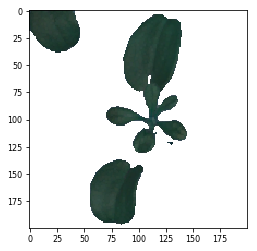

In [9]:
plt.imshow(images[0]) ##!!!!! damn 754
blur = cv2.GaussianBlur(images[0], (3, 3), 2)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
lower_green = np.array([22, 60, 0]) #second 75
upper_green = np.array([150, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
masked_img = cv2.bitwise_and(images[0], images[0], mask=opened_mask)

#masked_img = sharpen_image(masked_img)

masked_img[mask == 0] = 255

kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(masked_img,kernel,iterations = 1)

#den_image = cv2.fastNlMeansDenoisingColored(masked_img, None, 5, 5, 5, 5)
plt.imshow(dilation)

In [10]:
#dataset = create_dataset(images, labels)
dataset = create_dataset_added_features(images, labels, kind='label')

/Users/anacriel/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:132: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [11]:
dataset.head(30)

,label,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,...,med_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b,contrast,correlation,entropy
0,9,8187.0,4586.0,3,539.730009,75,128,0.585938,1.172591,35.581835,...,32.0,7.376986,7.378028,8.026931,0.846212,0.110724,0.494894,620.820617,0.954376,2.730047
0,9,9701.0,5565.0,2,483.730009,111,112,0.991071,1.281517,24.120681,...,33.0,6.267867,7.597510,7.166313,1.058406,-0.323742,0.534834,553.964840,0.961171,2.987405
0,9,7145.5,3140.0,3,218.994947,63,65,0.969231,0.573088,6.711747,...,36.0,7.900968,7.388426,7.264481,1.803612,0.264062,1.199339,512.600976,0.955396,2.381115
0,9,8913.5,4447.5,3,270.208151,68,93,0.731183,0.709486,8.191221,...,33.0,6.473530,5.690610,6.561376,1.330778,0.469514,0.959483,416.275869,0.969042,2.628161
0,9,11962.5,7318.5,2,343.747255,103,104,0.990385,0.895465,9.877716,...,35.0,7.712841,7.795521,8.419461,0.533848,0.048640,0.046007,478.351987,0.971566,3.609471
0,9,9689.5,5167.0,2,279.622364,76,87,0.873563,0.682388,8.069422,...,35.0,6.027561,4.848478,6.635850,1.391676,-0.035480,0.759057,363.621412,0.973574,2.775649
0,9,12881.0,12881.0,1,587.528998,172,155,1.109677,2.069715,26.798410,...,27.0,11.768665,10.817419,11.546140,0.961481,0.046497,0.394153,387.370530,0.977156,3.822080
0,9,9746.5,6647.0,2,700.239675,107,151,0.708609,1.657723,50.308891,...,30.0,6.707182,6.906068,8.054558,1.108876,0.381566,0.677175,727.002441,0.953473,3.019513
0,9,11406.5,5470.0,3,315.563488,89,87,1.022989,0.678823,8.730138,...,34.0,5.550765,6.946240,7.125686,-0.107417,-0.831615,-0.311977,550.005539,0.964877,3.330982
0,9,6522.5,6522.5,1,580.600066,107,181,0.591160,2.969260,51.682091,...,24.0,10.418261,8.172561,8.477522,0.991669,0.712567,1.114235,407.812854,0.963857,2.173767


In [12]:
dataset.to_csv("data/features_resolut_200_new_seg_1_med_skew.csv")